<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/Certificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Certificación

Responder las siguientes preguntas 1 a 4 usando el conjunto de datos dado en el enlace (datos).

* Edad: Representa la edad de cada persona en el conjunto de datos. Es una variable numérica que indica la cantidad de años que ha vivido cada individuo.
* Puntuación: Se refiere a una puntuación o calificación asociada a cada persona en el conjunto de datos. Puede representar el rendimiento en un examen, la satisfacción en una encuesta, o cualquier otra métrica cuantitativa relevante para el contexto.
* Ingresos: Indica el ingreso económico de cada persona en el conjunto de datos. Es una medida numérica del dinero que cada individuo gana en un período específico, como mensual o anualmente.
* Nivel de Educación: Esta variable categoriza el nivel educativo alcanzado por cada persona en el conjunto de datos. Puede incluir categorías como "Licenciatura", "Maestría", "Doctorado", entre otros, representando los diferentes grados académicos obtenidos por los individuos.

## datos.data

In [9]:
# prompt: cargar datos.data

import pandas as pd

# Assuming 'datos.data' is a CSV file.  Adjust the separator (sep) if needed.
# For other file types (e.g., Excel), use the appropriate pandas read function.
url_data = 'https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/datos.data'
try:
  df = pd.read_csv(url_data, sep=',') # Replace ',' with the correct separator if needed
  print(df.head()) # Display the first few rows to verify
except FileNotFoundError:
  print("Error: 'datos.data' file not found.")
except pd.errors.ParserError:
  print("Error: Could not parse the file. Check the file format and separator.")

   Edad  Puntuacion  Ingresos Nivel_de_Educacion
0    35          82     50000       Licenciatura
1    28          75     45000           Maestría
2    42          90     60000          Doctorado
3    30          68     48000       Licenciatura
4    39          85     55000           Maestría


In [11]:
df.describe()

,Edad,Puntuacion,Ingresos
count,20.00000,20.000000,20.000000
mean,35.50000,80.400000,52950.000000
std,5.91608,6.953984,5481.788029
min,26.00000,68.000000,44000.000000
25%,30.75000,74.750000,48750.000000
50%,35.50000,80.500000,52500.000000
75%,40.25000,86.250000,57250.000000
max,45.00000,91.000000,62000.000000


In [10]:
#¿Cuál es el promedio de edad en el conjunto de datos?
df.Edad.mean()

35.5

In [12]:
#La columna "puntuación" tiene un valor mínimo en el conjunto de datos de:
df.Puntuacion.min()

68

In [22]:
# ¿Cuántas personas en el conjunto de datos tienen una puntuación superior o igual a 80?
num_people_high_score = len(df[df['Puntuacion'] >= 80])
print(f"Number of people with a score greater than or equal to 80: {num_people_high_score}")

Number of people with a score greater than or equal to 80: 11


In [13]:
df.loc[df.Puntuacion >= 80].count()

,0
Edad,11
Puntuacion,11
Ingresos,11
Nivel_de_Educacion,11


In [24]:
# prompt: ¿Cuál es el nivel de educación más común en el conjunto de datos?

# Find the most common education level
most_common_education = df['Nivel_de_Educacion'].mode()[0]
print(f"The most common education level is: {most_common_education}")

The most common education level is:  Licenciatura


In [14]:
df.Nivel_de_Educacion.value_counts()

,count
Nivel_de_Educacion,
Licenciatura,8
Maestría,6
Doctorado,6


Responder las preguntas 5 A 10 usando los datos proporcionados

ARCHIVO
En el archivo encontraras las etiquetas <y_test>, los scores <y_score>  y la etiqueta predicha <y_pred> calculados usando un clasificador. Debes responder las siguientes preguntas usando la información contenida en el archivo. Los encabezados del archivo son en el mismo orden: 'Real_Label'  'Predicted_Score'   'Predicted_label'

## predicciones_scores.data

In [27]:
# prompt: leer predicciones_scores.data

import pandas as pd

# Assuming 'predicciones_score.data' is a CSV file. Adjust the separator (sep) if needed.
try:
    df = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/predicciones_scores.data', sep=',')  # Replace ',' with the correct separator if needed
    print(df.head())  # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'predicciones_score.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

   Real_Label  Predicted_Score  Predicted_label
0           0         0.156098                0
1           0         0.433585                0
2           1         0.957655                1
3           0         0.281928                0
4           0         0.336131                0


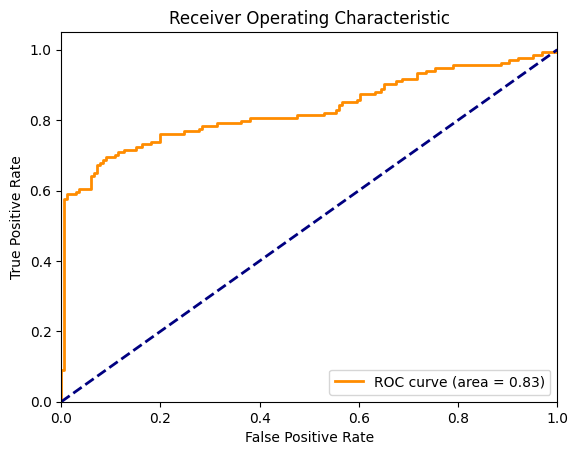

In [29]:
# prompt: Usando los scores proporcionados graficar la curva ROC

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract true labels and predicted scores
y_test = df['Real_Label']
y_score = df['Predicted_Score']

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

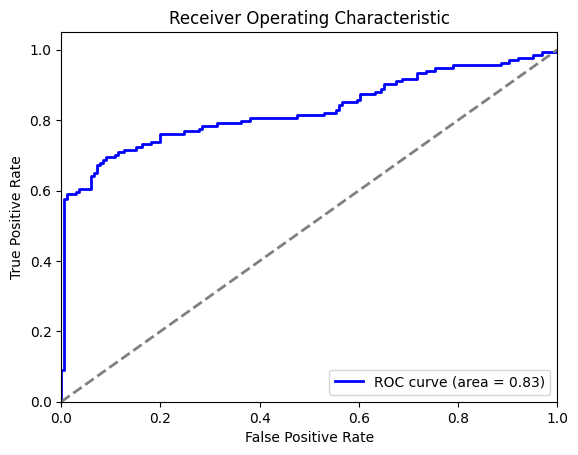

In [30]:
# prompt: graficar la curva ROC con los datos de df

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'df' contains 'y_true' (actual labels) and 'y_score' (predicted probabilities)
# Replace 'y_true' and 'y_score' with the actual column names in your DataFrame

try:
    fpr, tpr, thresholds = roc_curve(df['Real_Label'], df['Predicted_Score']) # Replace with your column names
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'y_true' and 'y_score' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [32]:
# prompt: calcular accuracy con los datos de df

from sklearn.metrics import accuracy_score

# Assuming 'df' contains 'Real_Label' (true labels) and a column with predicted labels
# Replace 'Predicted_Label' with the actual column name in your DataFrame
try:
    accuracy = accuracy_score(df['Real_Label'], df['Predicted_label'])
    print(f"Accuracy: {accuracy}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_Label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Accuracy: 0.8


In [34]:
# prompt: calcular la metrica precision del df

from sklearn.metrics import precision_score

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    precision = precision_score(df['Real_Label'], df['Predicted_label'])
    print(f"Precision: {precision}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Precision: 0.8936170212765957


In [35]:
# prompt: calcular recall del df

from sklearn.metrics import recall_score

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    recall = recall_score(df['Real_Label'], df['Predicted_label'])
    print(f"Recall: {recall}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Recall: 0.6268656716417911


In [38]:
# prompt:  El clasificador identificó correctamente más de 85% de las instancias de la clase negativa.

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
try:
    # Filter for negative class instances (assuming 0 represents the negative class)
    negative_instances = df[df['Real_Label'] == 0]

    # Count correctly classified negative instances
    correctly_classified_negative = len(negative_instances[negative_instances['Real_Label'] == negative_instances['Predicted_label']])

    # Calculate the percentage of correctly classified negative instances
    percentage_correct_negative = (correctly_classified_negative / len(negative_instances)) * 100

    print(f"Percentage of correctly classified negative instances: {percentage_correct_negative:.2f}%")

except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Percentage of correctly classified negative instances: 93.98%


In [36]:
# prompt: calcular especificidad del df

# Assuming 'df' contains 'Real_Label' (true labels) and 'Predicted_label' (predicted labels)
from sklearn.metrics import confusion_matrix

try:
    tn, fp, fn, tp = confusion_matrix(df['Real_Label'], df['Predicted_label']).ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity}")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Make sure 'Real_Label' and 'Predicted_label' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Specificity: 0.9397590361445783


In [39]:
# prompt: Verdadero o Falso - El número de falsos negativos es mayor que el de falsos positivos.

try:
    tn, fp, fn, tp = confusion_matrix(df['Real_Label'], df['Predicted_label']).ravel()
    print(f"False Negatives (FN): {fn}")
    print(f"False Positives (FP): {fp}")
    if fn > fp:
        print("Verdadero: El número de falsos negativos es mayor que el de falsos positivos.")
    else:
        print("Falso: El número de falsos negativos no es mayor que el de falsos positivos.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

False Negatives (FN): 50
False Positives (FP): 10
Verdadero: El número de falsos negativos es mayor que el de falsos positivos.


In [37]:
fn > fp

True

#Responder las preguntas 11 A 14 usando los datos proporcionados
El archivo contiene dos conjuntos de datos: train y test. Debe entrenar un clasificador KNN y un modelo de regresión logística para responder las siguientes preguntas.


In [40]:
# prompt: cargar data1.data
import pandas as pd
try:
    df_test = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3/test_set.csv', sep=',') # Replace ',' with the correct separator if needed
    print(df_test.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(300, 3)


In [42]:
# prompt: cargar data1.data
import pandas as pd
try:
    df_train = pd.read_csv('https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset3/train_set.csv', sep=',') # Replace ',' with the correct separator if needed
    print(df_train.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(700, 3)


In [44]:
df_train.describe()

,feat1,feat2,target
count,700.000000,700.000000,700.000000
mean,0.498070,-0.121027,0.395714
std,1.113782,0.894658,0.489353
min,-2.869693,-2.587213,0.000000
25%,-0.258868,-0.768702,0.000000
50%,0.474950,-0.207783,0.000000
75%,1.215672,0.475407,1.000000
max,4.495802,2.842864,1.000000


In [45]:
# prompt: Debe entrenar un clasificador KNN y un modelo de regresión logística

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Prepare the data for training
X_train = df_train.drop('target', axis=1)  # Features
y_train = df_train['target']  # Target variable
X_test = df_test.drop('target', axis=1)  # Features for testing
y_test = df_test['target']  # Target variable for testing


# Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)  # You may need to adjust max_iter for convergence
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

KNN Accuracy: 0.9133333333333333
Logistic Regression Accuracy: 0.8


In [48]:
# prompt: Verdadero o Falso - Los datos tienen igual proporción de registros (instancias) de cada clase. Son clases balanceadas.
class_counts = df_train['target'].value_counts()
print(class_counts)

# Check if the classes are balanced (e.g., within 10% of each other)
if class_counts.min() / class_counts.max() > 0.9:
    print("Verdadero: Los datos tienen una proporción similar de registros de cada clase.")
else:
    print("Falso: Los datos no tienen una proporción similar de registros de cada clase.")

target
0    423
1    277
Name: count, dtype: int64
Falso: Los datos no tienen una proporción similar de registros de cada clase.


In [50]:
# prompt:Identifica el mejor valor de K - vecinos y su respectivo accuracy para el clasificador KNN entre Un k [3, 5 ,7]

best_k = -1
best_accuracy = -1

# Test different k values
for k in [3, 5, 7]:  # Iterate through your desired k-values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"k = {k}, Accuracy = {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k: {best_k}, Best Accuracy: {best_accuracy}")

k = 3, Accuracy = 0.9233333333333333
k = 5, Accuracy = 0.9133333333333333
k = 7, Accuracy = 0.9166666666666666

Best k: 3, Best Accuracy: 0.9233333333333333


In [51]:
# prompt: Usando K=7, el número de falsos positivos es:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_k7 = knn.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_k7).ravel()
print(f"Using K=7, the number of false positives is: {fp}")

Using K=7, the number of false positives is: 8


In [53]:
# prompt: Usando un modelo de regresión logística, selecciona los parámetros del modelo que más se aproximen a su estimación. No es necesario normalizar los datos:
# Coeficientes, Intercepto

# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", logistic_regression.coef_)
print("Intercept:", logistic_regression.intercept_)

Coefficients: [[-0.32542512  1.43318533]]
Intercept: [-0.12096481]


#Responder las siguientes preguntas 15 a 22  usando los datos del siguiente enlace:


In [119]:
# prompt: cargar data1.data
import pandas as pd
try:
    df = pd.read_csv('/content/datos_FEAT_SEL.data', sep=',') # Replace ',' with the correct separator if needed
    print(df.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'datos_FEAT_SEL.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

(10000, 1296)


In [57]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min,previous_loans_CNT_PAYMENT_sum,previous_loans_NFLAG_LAST_APPL_IN_DAY_mean,client_credit_AMT_INST_MIN_REGULARITY_max_mean,client_credit_SK_DPD_DEF_max_min,client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean,client_credit_AMT_PAYMENT_CURRENT_max_sum,client_installments_AMT_INSTALMENT_mean_sum,client_credit_AMT_DRAWINGS_CURRENT_min_mean,previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9.993000e+03,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,1925.000000,9515.000000,9515.000000,2797.000000,2797.000000,2.797000e+03,2.797000e+03,9.532000e+03,2797.000000,9515.000000
mean,0.416300,1.674489e+05,6.007531e+05,27088.010550,5.403851e+05,0.020898,-16025.273100,62821.78480,-4986.483900,-2983.38080,...,0.109091,61.418287,0.997547,7097.791624,0.430819,8.127504e+04,3.294789e+06,6.767073e+05,507.801019,0.083986
std,0.722251,9.422260e+04,4.032643e+05,14384.946154,3.708941e+05,0.013909,4340.528828,140464.31594,3540.591931,1512.51078,...,0.380864,75.359647,0.023459,8525.691828,2.312640,3.727027e+05,6.212823e+06,9.316769e+05,6485.513595,0.200241
min,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.00000,-20981.000000,-6228.00000,...,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000e+00,0.000000e+00,9.450000e-01,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16434.000000,2.385000e+05,0.010006,-19595.250000,-2818.25000,-7491.250000,-4297.00000,...,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.309939e+05,0.000000,0.000000
50%,0.000000,1.440000e+05,5.130000e+05,24970.500000,4.500000e+05,0.018850,-15783.500000,-1224.00000,-4478.000000,-3227.00000,...,0.000000,36.000000,1.000000,4698.450000,0.000000,0.000000e+00,7.100460e+05,3.192946e+05,0.000000,0.000000
75%,1.000000,2.025000e+05,8.100000e+05,34636.500000,6.840000e+05,0.028663,-12388.750000,-286.75000,-2004.000000,-1707.00000,...,0.000000,78.000000,1.000000,9503.190000,0.000000,4.857840e+04,4.387500e+06,8.288479e+05,0.000000,0.000000
max,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.00000,0.000000,0.00000,...,5.000000,1252.000000,1.000000,47344.815000,60.000000,1.446357e+07,1.704000e+08,1.475254e+07,223554.645000,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1296 entries, NAME_CONTRACT_TYPE to previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
dtypes: float64(1240), int64(40), object(16)
memory usage: 98.9+ MB


In [59]:
df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min',
       'previous_loans_CNT_PAYMENT_sum',
       'previous_loans_NFLAG_LAST_APPL_IN_DAY_mean',
       'client_credit_AMT_INST_MIN_REGULARITY_max_mean',
       'client_credit_SK_DPD_DEF_max_min',
       'client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean',
       'client_credit_AMT_PAYMENT_CURRENT_max_sum',
       'client_installments_AMT_INSTALMENT_mean_sum',
       'client_credit_AMT_DRAWINGS_CURRENT_min_mean',
       'previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm'],
      dtype='object', length=1296)

In [65]:
# prompt: FALSO o VERDADERO: La base de datos está balanceada

class_counts = df['TARGET'].value_counts()
print(class_counts)

# Check if the classes are balanced (e.g., within 10% of each other)
if class_counts.min() / class_counts.max() > 0.9:
    print("Verdadero: Los datos tienen una proporción similar de registros de cada clase.")
else:
    print("Falso: Los datos no tienen una proporción similar de registros de cada clase.")

TARGET
0    9225
1     775
Name: count, dtype: int64
Falso: Los datos no tienen una proporción similar de registros de cada clase.


In [66]:
# prompt: El número de variables, sin incluir la variable objetivo, es:
num_variables = len(df.columns) - 1  # Subtract 1 for the target variable
print(f"El número de variables, sin incluir la variable objetivo, es: {num_variables}")

El número de variables, sin incluir la variable objetivo, es: 1295


In [126]:
# prompt: Del dataset df Separar la columna "TARGET" y eliminar dicha columna del dataframe original.
# Identiifica cuantas varibles existen antes de  aplicar one-hot-ecoding
# Crea una funcion para Aplicar one-hot-ecoding  usando sklearn.preprocessing.OneHotEncoder a las variables categóricas de base de datos.
# el dtypenumber son float64, int64
# Cuenta el  nuevo número de variables

from sklearn.preprocessing import OneHotEncoder
# prompt: cargar data1.data
import pandas as pd
try:
    df = pd.read_csv('/content/datos_FEAT_SEL.data', sep=',') # Replace ',' with the correct separator if needed
    print(df.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'datos_FEAT_SEL.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")
# Separar la columna "TARGET"
y = df["TARGET"]
df = df.drop(columns=["TARGET"])

# Identificar el número de variables antes de One-Hot Encoding
num_variables_before = len(df.columns)
print(f"Número de variables antes de One-Hot Encoding: {num_variables_before}")

# Función para aplicar One-Hot Encoding
def aplicar_one_hot_encoding(df):
    # Crear una instancia del codificador One-Hot Encoder
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')  # sparse=False para obtener un array denso

    # Obtener las columnas categóricas (asumiendo que son de tipo 'object')
    categorical_cols = df.select_dtypes(include=["object"]).columns

    if len(categorical_cols) == 0:
        print("No hay columnas categóricas para codificar.")
        return df

    # Ajustar y transformar las columnas categóricas
    encoded_data = encoder.fit_transform(df[categorical_cols])

    # Crear un nuevo DataFrame con las características codificadas
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    # Eliminar las columnas categóricas originales
    df = df.drop(columns=categorical_cols)

    # Concatenar el DataFrame original con las características codificadas
    df = pd.concat([df, encoded_df], axis=1)
    return df

# Aplicar One-Hot Encoding al DataFrame
df = aplicar_one_hot_encoding(df)

# Contar el nuevo número de variables
num_variables_after = len(df.columns)
print(f"Número de variables después de One-Hot Encoding: {num_variables_after}")

(10000, 1296)
Número de variables antes de One-Hot Encoding: 1295
Número de variables después de One-Hot Encoding: 1416


In [128]:
# prompt: Para dataframe df Calcular la matriz de correlación. Esta matriz mide la correlación entre todos los pares de variables. Debes eliminar una de las variables (de cada par evaluado) cuando el valor absoluto de la correlación supere 0.9. El número de variables resultantes es:

import pandas as pd

# Assuming df is already loaded as in the provided code
# ... (previous code to load df)

corr_matrix = df.corr()
#print(corr_matrix)

columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > 0.9:
      colname = corr_matrix.columns[i]
      columns_to_drop.add(colname)

df_reduced = df.drop(columns=list(columns_to_drop))

num_variables_resultantes = len(df_reduced.columns)
print(f"El número de variables resultantes es: {num_variables_resultantes}")

El número de variables resultantes es: 881


In [ ]:
# prompt: cargar data1.data
import pandas as pd
try:
    df_data1 = pd.read_csv('data1.data', sep=',') # Replace ',' with the correct separator if needed
    print(df_data1.shape) # Display the first few rows to verify
except FileNotFoundError:
    print("Error: 'data1.data' file not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check the file format and separator.")

In [ ]:
df_data1.describe()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)  # Test k values from 1 to 9
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df_data1)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metodo del codo')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=5, random_state=0)
kmeanModel.fit(df_data1)
y_pred = kmeanModel.predict(df_data1)

In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_data1)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()